In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from openpyxl import load_workbook


df = pd.read_parquet('fixtypes.parquet')
print(df)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

## Summary of annual income

          Profit
Year            
2014  49543.9741
2015  61618.6037
2016  81795.1743
2017  93439.2696


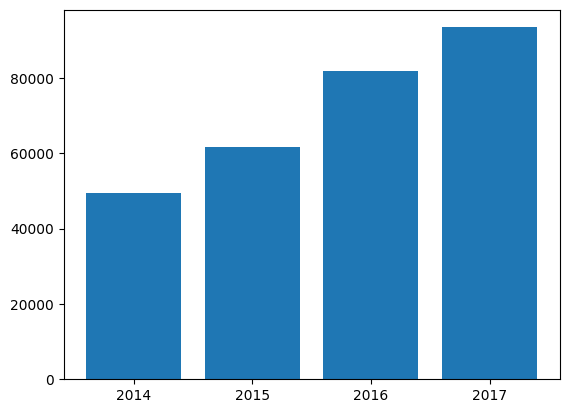

In [5]:
group_by_year = df
group_by_year['Year'] = group_by_year['Order Date'].dt.year
group_by_year = group_by_year[['Year', 'Profit']].groupby('Year').sum()

group_by_year.to_excel('excel/annual_income.xlsx')

print(group_by_year)
plt.bar(group_by_year.index.astype('string').to_list(), group_by_year['Profit'].to_list())
plt.show()



## Summary of income for each month of each year

In [6]:
years = group_by_year.index.to_list()

for y in years:
    print(f'year : {y}')
    year = df[df['Order Date'].dt.year == y]
    year['month'] = year['Order Date'].dt.month
    profit_months = year[['month', 'Profit']].groupby(['month']).sum()


    xlsx_files = f'excel/{y}.xlsx'
    profit_months.to_excel(xlsx_files)
    total = profit_months['Profit'].sum()

    wb = load_workbook(xlsx_files)
    sheet = wb['Sheet1']

    sheet["D1"] = "Annual income"
    sheet["E1"] = total
    wb.save(f"excel/{y}.xlsx")
    
    for i in range (1,13):
        days = year[year['month'] == i]
        days[['Ship Date', 'Order Date']] = days[['Ship Date', 'Order Date']].astype('string')
    
        days = days.sort_values('Order Date')
        days = days.drop(['Row ID','month'], axis=1)
        
        with pd.ExcelWriter(xlsx_files, engine='openpyxl', mode='a') as writer:
            days.to_excel(writer, sheet_name=f'{i}', index=False)
        
        

    
    
    
    

year : 2014


/var/folders/lt/pxbjpf390zv90vnz4h0hphvc0000gn/T/ipykernel_21626/3882259809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['month'] = year['Order Date'].dt.month
/var/folders/lt/pxbjpf390zv90vnz4h0hphvc0000gn/T/ipykernel_21626/3882259809.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days[['Ship Date', 'Order Date']] = days[['Ship Date', 'Order Date']].astype('string')
/var/folders/lt/pxbjpf390zv90vnz4h0hphvc0000gn/T/ipykernel_21626/3882259809.py:23: SettingWithCopyWarning: 
A value is tryin

year : 2015


/var/folders/lt/pxbjpf390zv90vnz4h0hphvc0000gn/T/ipykernel_21626/3882259809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['month'] = year['Order Date'].dt.month
/var/folders/lt/pxbjpf390zv90vnz4h0hphvc0000gn/T/ipykernel_21626/3882259809.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days[['Ship Date', 'Order Date']] = days[['Ship Date', 'Order Date']].astype('string')
/var/folders/lt/pxbjpf390zv90vnz4h0hphvc0000gn/T/ipykernel_21626/3882259809.py:23: SettingWithCopyWarning: 
A value is tryin

year : 2016


/var/folders/lt/pxbjpf390zv90vnz4h0hphvc0000gn/T/ipykernel_21626/3882259809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['month'] = year['Order Date'].dt.month
/var/folders/lt/pxbjpf390zv90vnz4h0hphvc0000gn/T/ipykernel_21626/3882259809.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days[['Ship Date', 'Order Date']] = days[['Ship Date', 'Order Date']].astype('string')
/var/folders/lt/pxbjpf390zv90vnz4h0hphvc0000gn/T/ipykernel_21626/3882259809.py:23: SettingWithCopyWarning: 
A value is tryin

year : 2017


/var/folders/lt/pxbjpf390zv90vnz4h0hphvc0000gn/T/ipykernel_21626/3882259809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['month'] = year['Order Date'].dt.month
/var/folders/lt/pxbjpf390zv90vnz4h0hphvc0000gn/T/ipykernel_21626/3882259809.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days[['Ship Date', 'Order Date']] = days[['Ship Date', 'Order Date']].astype('string')
/var/folders/lt/pxbjpf390zv90vnz4h0hphvc0000gn/T/ipykernel_21626/3882259809.py:23: SettingWithCopyWarning: 
A value is tryin